<a href="https://colab.research.google.com/github/uoahy-6uoas/proj-ALD/blob/add-all-append/projALD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def dict_maker(isbn) -> dict:
  from bs4 import BeautifulSoup
  from urllib.request import urlopen

  html = urlopen("https://www.aladin.co.kr/search/wsearchresult.aspx?SearchTarget=Used&KeyWord="+isbn+"&KeyRecentPublish=0&OutStock=0&ViewType=Detail&CustReviewCount=0&CustReviewRank=0&KeyFullWord="+isbn+"&KeyLastWord="+isbn+"&CategorySearch=&chkKeyTitle=&chkKeyAuthor=&chkKeyPublisher=&chkKeyISBN=&chkKeyTag=&chkKeyTOC=&chkKeySubject=&SuggestKeyWord=")
  bs0bj = BeautifulSoup(html.read(),'html.parser') #html 전체 저장해놓고 있군..

  bo_used = bs0bj.findAll("a",{"class":"bo_used"}) #<a class="bo_used" href="~~">eBook</a> 같은 것 찾아줌
  tmp_type, tmp_price, store_price =[], [], {}
  used_store_html = []
  for i in bo_used:
    if '원' in i.get_text(): # get_text하면 eBook만 출력함
      try:
        tmp_price.append(int(''.join(i.get_text()[:-1].split(','))))
      except:
        tmp_price.append(100000000) #절판됐으면 엄두도 못 낼 가격으로 해서 배제해버리자
    else:
      tmp_type.append(i.get_text())
    if '우주점' in i.get_text():
      used_store_html.append('https://www.aladin.co.kr' + i.attrs['href'])

  for i in range(len(tmp_type)):
    if tmp_type[i]=='새책' or '알라딘' in tmp_type[i]:
      try: #직배송 중고 있으면
        store_price['직배송'] = min(tmp_price[i],store_price['직배송'])
      except: #직배송 중고 없으면
        store_price['직배송'] = tmp_price[i]
  #타입에 물건이 없으면 <span class='bo_used'~~>로 바뀜
  if used_store_html != []:
    for i in used_store_html:
      html = urlopen(i)
      bs0bj = BeautifulSoup(html.read(),'html.parser')
      price = bs0bj.findAll('span',{"class":"Ere_fs20 Ere_sub_pink"}) #가격 리스트를 전달 함
      seller = bs0bj.findAll('li',{"class":"Ere_store_name"}) # 매장 리스트를 전달함
        # findAll은 위에서부터 순서대로 찾아내서 같은 인덱스번호에 매장-가격 위치함
      for j in range(len(price)):
        for k in range(len(price)):
          if seller[k].get_text()[4:] in store_price: #같은 매장에서는 최저가만
            pass
          else:
            store_price[seller[k].get_text()[4:]] = int(''.join(price[k].get_text().split(",")))
  else:
    pass

  try:
    if store_price['직배송']==100000000: #절판인데 알라딘 직배송 중고가 없다면
      del store_price['직배송']
  except:
    pass
  if store_price == {}:
    return {'절판된 책':isbn}
  return store_price

In [2]:
import time

every = []

ii = time.time()

while 1:
  isbn = input('ISBN 하나씩 입력, q로 종료 : ')
  i = time.time()
  if isbn =='q' or isbn =='Q':
    break
  else:
    every.append(dict_maker(isbn))
  f = time.time()
  print(f"time recored : {f-i}s")

ff = time.time()

'''
9791191891287
9791192579504
9791156641131
9791162241639
9788968484698
9788996991342
'''
print(f"time recored : {ff-ii}s")

ISBN 하나씩 입력, q로 종료 : 9791191891287
time recored : 7.6949543952941895s
ISBN 하나씩 입력, q로 종료 : 9791192579504
time recored : 6.489717721939087s
ISBN 하나씩 입력, q로 종료 : 9791156641131
time recored : 4.71483588218689s
ISBN 하나씩 입력, q로 종료 : 9791162241639
time recored : 6.419267416000366s
ISBN 하나씩 입력, q로 종료 : 9788968484698
time recored : 10.065304517745972s
ISBN 하나씩 입력, q로 종료 : 9788996991342
time recored : 24.34664297103882s
ISBN 하나씩 입력, q로 종료 : q
time recored : 77.28258037567139s


In [3]:
def d2l(d) ->list:
  tmp = []
  for i in d:
    tmp.append([i,d[i]])
  return tmp

In [4]:
carted_all = []
for i in every:
  carted_all.append(d2l(i))

# todo = 합성함수 구현하기
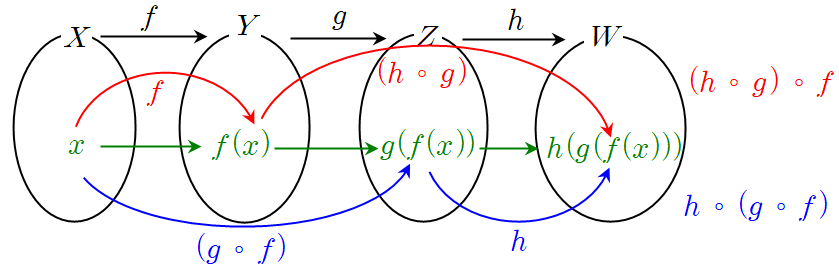